In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from Bio.Seq import Seq

In [2]:
df_dataset = pd.read_csv("../data/dataset/final.csv")

# Nucleotide distribution

In [3]:
def count_nucleotide(seq, nucleotide):
    return seq.count(nucleotide)

In [4]:
df_nucleotide_distribution = df_dataset.copy()

df_nucleotide_distribution["count_A"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "A"), axis=1)
df_nucleotide_distribution["count_T"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "T"), axis=1)
df_nucleotide_distribution["count_G"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "G"), axis=1)
df_nucleotide_distribution["count_C"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "C"), axis=1)
df_nucleotide_distribution["count_N"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "N"), axis=1)
df_nucleotide_distribution["count_-"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "-"), axis=1)

print(df_nucleotide_distribution.columns)

Index(['parent', 'child', 'count_A', 'count_T', 'count_G', 'count_C',
       'count_N', 'count_-'],
      dtype='object')


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 1.300e+01, 1.300e+01,
        2.100e+01, 1.700e+01, 4.000e+0

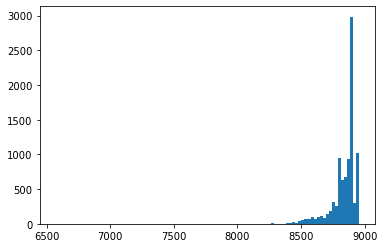

In [5]:
plt.hist(df_nucleotide_distribution["count_A"], bins=100)
#TODO: nice plots of nucleotide distibution

# Differences between parent child sequences

In [6]:
def equal_columns(df_dataset):
    comparison_column = np.where(df_dataset["parent"] == df_dataset["child"], True, False)
    print("From {} parent child pairs {} pairs are completely equal".format(df_dataset["parent"].count(), comparison_column.sum()))

equal_columns(df_dataset)

From 9199 parent child pairs 396 pairs are completely equal


In [7]:
def count_string_differences(seq1, seq2):
    count = sum(1 for a, b in zip(seq1, seq2) if a != b)
    return count

In [8]:
df_dataset["count_different_nucleotides"] = df_dataset.apply(lambda row: count_string_differences(row["parent"], row["child"]), axis=1)

Text(0.5, 1.0, 'Differences between parent child pairs')

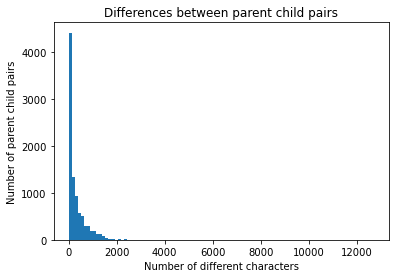

In [9]:
plt.hist(df_dataset["count_different_nucleotides"], bins=100)
plt.xlabel('Number of different characters')
plt.ylabel('Number of parent child pairs')
plt.title('Differences between parent child pairs')

# Which genetic loci are often mutated?

In [10]:
def boolean_mask_of_differences(parent, child):
    # mutation = difference -> True
    return np.array(list(parent)) != np.array(list(child))

In [11]:
df_mutation_locis = df_dataset.copy()
df_mutation_locis["mutation_positions"] = df_mutation_locis.apply(lambda row: boolean_mask_of_differences(row["parent"], row["child"]), axis=1)

In [12]:
mutation_positions_matrix = df_mutation_locis["mutation_positions"].to_numpy()

print(mutation_positions_matrix)
print(mutation_positions_matrix.shape)
number_mutations = sum(mutation_positions_matrix)
print(sum(mutation_positions_matrix))
print(len(sum(mutation_positions_matrix)))

[array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False]) ...
 array([False, False, False, ..., False, False, False])
 array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False])]
(9199,)
[  53   85  375 ... 1829 1829    0]
29904


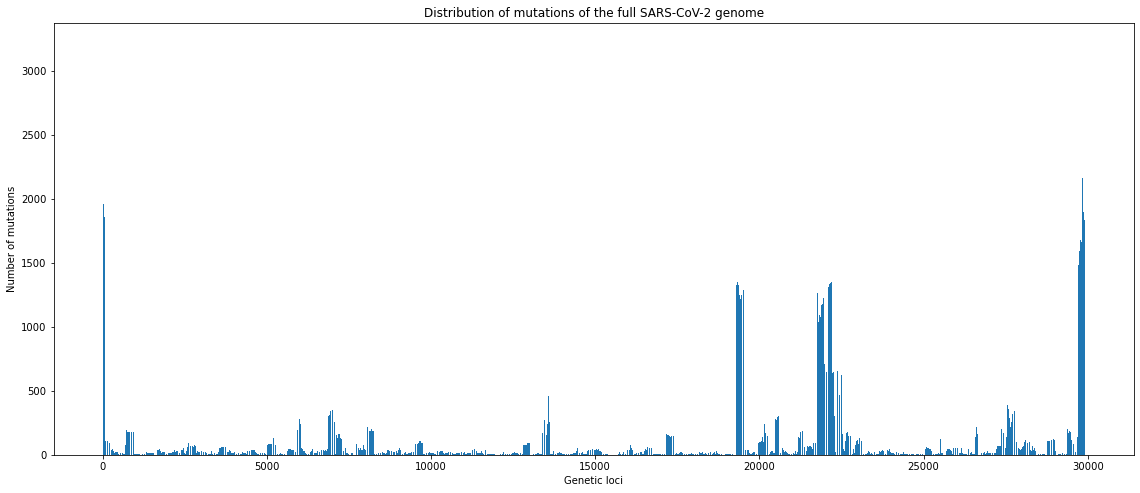

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])
number_genetic_loci = range(29904)
ax.bar(number_genetic_loci,number_mutations)
plt.title('Distribution of mutations of the full SARS-CoV-2 genome')
plt.xlabel('Genetic loci')
plt.ylabel('Number of mutations')
plt.show()

In [ ]:
# TODO: verschiedene Bereiche des Coronavirus verschieden einfärben?

In [106]:
reference_genome = df_dataset["parent"][0]

for m in re.finditer('ATG', reference_genome):
         print('AUG found', m.start(), m.end())

AUG found 106 109
AUG found 265 268
AUG found 407 410
AUG found 467 470
AUG found 488 491
AUG found 506 509
AUG found 512 515
AUG found 517 520
AUG found 593 596
AUG found 725 728
AUG found 784 787
AUG found 818 821
AUG found 845 848
AUG found 900 903
AUG found 965 968
AUG found 971 974
AUG found 1010 1013
AUG found 1064 1067
AUG found 1071 1074
AUG found 1145 1148
AUG found 1153 1156
AUG found 1193 1196
AUG found 1197 1200
AUG found 1207 1210
AUG found 1225 1228
AUG found 1254 1257
AUG found 1352 1355
AUG found 1380 1383
AUG found 1430 1433
AUG found 1502 1505
AUG found 1604 1607
AUG found 1673 1676
AUG found 1865 1868
AUG found 1976 1979
AUG found 2009 2012
AUG found 2014 2017
AUG found 2017 2020
AUG found 2056 2059
AUG found 2126 2129
AUG found 2455 2458
AUG found 2629 2632
AUG found 2680 2683
AUG found 2683 2686
AUG found 2744 2747
AUG found 2801 2804
AUG found 2825 2828
AUG found 2870 2873
AUG found 2894 2897
AUG found 2957 2960
AUG found 2968 2971
AUG found 2990 2993
AUG found 30